# Introduction

In this project, we will apply K-Means clustering to address the following questions:

- Which regions have similar average rice prices across a given period?
- How do rice types (e.g., regular milled vs superior milled) cluster based on pricing?
- Can we group markets based on how they price different rice types?

Additionally, we will answer the following questions through time series and descriptive analysis:

- How has the price of rice changed in different regions over time?
- Which regions experience the most volatile rice prices?
- Is there an existing seasonal pattern in rice price volatility?

The [dataset](https://data.humdata.org/dataset/wfp-food-prices-for-philippines), sourced from the World Food Programme Price Database, offers an in-depth look at food prices in the Philippines. Covering key staples such as maize, rice, beans, fish, and sugar, it serves as a valuable tool for analyzing the dynamics of the nation’s food economy.


| **Column Name** | **Description** |
|------------------|-----------------|
| `date`           | The date when the food price was recorded. Helps track trends over time. |
| `admin1`         | The first-level administrative region (e.g., province or region like "Metro Manila"). |
| `admin2`         | The second-level administrative region (e.g., city or municipality within a province). |
| `market`         | The name of the specific market where the price was observed. |
| `latitude`       | Geographic latitude of the market. Useful for mapping and regional analysis. |
| `longitude`      | Geographic longitude of the market. |
| `category`       | Broad classification of the food (e.g., cereals, meats, legumes). |
| `commodity`      | Specific food item being priced (e.g., "Rice (local)", "Sugar", "Tilapia"). |
| `unit`           | The unit of measurement for the price (e.g., "kg", "piece", "liter"). |
| `priceflag`      | Indicates how the price was obtained: `"actual"` (directly recorded) or `"aggregate"` (averaged or estimated). |
| `pricetype`      | Type of market price: typically `"retail"` or `"wholesale"`. |
| `currency`       | Currency in which the price is reported — usually `"Philippine Peso"`. |
| `price`          | The reported price of the commodity in the local currency and unit. |
| `usdprice`       | The same price converted to USD (based on exchange rates at the time). |

In [18]:
import pandas as pd

pd.set_option('display.max_columns', 500)
food_prices_data = pd.read_csv("wfp_food_prices_phl.csv", skiprows=[1])

1 row containing the metadata for each column was skipped when reading the dataset

# Data Cleaning and Exploration

In [19]:
# Number of data and features 
print(food_prices_data.shape)
print(len(str(food_prices_data.shape))*'-')

# Check how many types of data are in the dataset
print(food_prices_data.dtypes.value_counts())
print(len(str(food_prices_data.shape))*'-')

# Check the first 16 columns
food_prices_data.head(16)


(198764, 16)
------------
object     10
float64     4
int64       2
Name: count, dtype: int64
------------


,date,admin1,admin2,market,market_id,latitude,longitude,category,commodity,commodity_id,unit,priceflag,pricetype,currency,price,usdprice
0,2000-01-15,National Capital region,Metropolitan Manila,Metro Manila,167,14.60,120.98,cereals and tubers,Maize flour (yellow),573,KG,actual,Retail,PHP,15.00,0.37
1,2000-01-15,National Capital region,Metropolitan Manila,Metro Manila,167,14.60,120.98,cereals and tubers,"Rice (milled, superior)",593,KG,actual,Retail,PHP,20.00,0.49
2,2000-01-15,National Capital region,Metropolitan Manila,Metro Manila,167,14.60,120.98,cereals and tubers,"Rice (milled, superior)",593,KG,actual,Wholesale,PHP,18.35,0.45
3,2000-01-15,National Capital region,Metropolitan Manila,Metro Manila,167,14.60,120.98,cereals and tubers,"Rice (regular, milled)",80,KG,actual,Retail,PHP,18.00,0.44
4,2000-01-15,National Capital region,Metropolitan Manila,Metro Manila,167,14.60,120.98,cereals and tubers,"Rice (regular, milled)",80,KG,actual,Wholesale,PHP,16.35,0.40
5,2000-01-15,National Capital region,Metropolitan Manila,Metro Manila,167,14.60,120.98,"meat, fish and eggs",Meat (pork),140,KG,actual,Retail,PHP,105.37,2.60
6,2000-01-15,Region III,Nueva Ecija,Palayan,171,15.54,121.08,cereals and tubers,"Rice (milled, superior)",593,KG,actual,Retail,PHP,19.00,0.47
7,2000-01-15,Region III,Nueva Ecija,Palayan,171,15.54,121.08,cereals and tubers,"Rice (milled, superior)",593,KG,actual,Wholesale,PHP,18.00,0.44
8,2000-01-15,Region III,Nueva Ecija,Palayan,171,15.54,121.08,cereals and tubers,"Rice (regular, milled)",80,KG,actual,Retail,PHP,18.10,0.45
9,2000-01-15,Region III,Nueva Ecija,Palayan,171,15.54,121.08,"meat, fish and eggs",Meat (pork),140,KG,actual,Retail,PHP,77.00,1.90


In [20]:
# Check The amount of regions recorded


for region in food_prices_data['admin1'].unique():
    print(region)


print(f"TOTAL REGION: {food_prices_data['admin1'].nunique()}")

National Capital region
Region III
Region IX
Region VI
Region VII
Region XI
Region XII
Autonomous region in Muslim Mindanao
Cordillera Administrative region
Region I
Region II
Region IV-A
Region IV-B
Region V
Region VIII
Region X
Region XIII
TOTAL REGION: 17


### Check for Missing Values

In [21]:
food_prices_data.isnull().sum()

date            0
admin1          0
admin2          0
market          0
market_id       0
latitude        0
longitude       0
category        0
commodity       0
commodity_id    0
unit            0
priceflag       0
pricetype       0
currency        0
price           0
usdprice        0
dtype: int64

### Check Column Values

In [22]:
commodity_counts = food_prices_data["commodity"].value_counts().reset_index()
commodity_counts.columns = ["commodity", "count"]
print(commodity_counts.to_string(index=False))

                          commodity  count
             Rice (regular, milled)   8781
                        Meat (pork)   7052
                           Tomatoes   6566
                            Carrots   6530
                            Cabbage   6344
      Meat (beef, chops with bones)   6029
              Meat (chicken, whole)   5857
                       Onions (red)   5737
                               Eggs   5638
                   Potatoes (Irish)   5435
                 Rice (well milled)   4838
                          Eggplants   4833
                    Fish (milkfish)   4630
                       Bitter melon   4584
                     Rice (special)   4523
                   Fish (roundscad)   4433
                            Coconut   4338
            Meat (pork, with bones)   4322
                     Fish (tilapia)   4195
                        Meat (beef)   4037
                       Beans (mung)   4035
                  Bananas (lakatan)   3941
           

In [23]:
food_prices_data["currency"].value_counts()

currency
PHP    198764
Name: count, dtype: int64

### Filter Unnecessary Data

In [24]:
food_prices_data = food_prices_data.drop(columns=["category", "currency", "latitude", "longitude"])
food_prices_data.head()

,date,admin1,admin2,market,market_id,commodity,commodity_id,unit,priceflag,pricetype,price,usdprice
0,2000-01-15,National Capital region,Metropolitan Manila,Metro Manila,167,Maize flour (yellow),573,KG,actual,Retail,15.00,0.37
1,2000-01-15,National Capital region,Metropolitan Manila,Metro Manila,167,"Rice (milled, superior)",593,KG,actual,Retail,20.00,0.49
2,2000-01-15,National Capital region,Metropolitan Manila,Metro Manila,167,"Rice (milled, superior)",593,KG,actual,Wholesale,18.35,0.45
3,2000-01-15,National Capital region,Metropolitan Manila,Metro Manila,167,"Rice (regular, milled)",80,KG,actual,Retail,18.00,0.44
4,2000-01-15,National Capital region,Metropolitan Manila,Metro Manila,167,"Rice (regular, milled)",80,KG,actual,Wholesale,16.35,0.40


Since we will only be focusing on rice prices, the category column is unnecessary because we will only have 1 category. Currency will also be removed since all valUes in price column are in PHP

### Change Data Types

Convert price, latitude, and longitude to numbers, and date to datetime format. Invalid entries are safely turned into NaN or NaT using errors="coerce". 

In [25]:
food_prices_data["price"] = pd.to_numeric(food_prices_data["price"], errors="coerce")
# food_prices_data["latitude"] = pd.to_numeric(food_prices_data["latitude"], errors="coerce")
# food_prices_data["longitude"] = pd.to_numeric(food_prices_data["longitude"], errors="coerce")
food_prices_data["date"] = pd.to_datetime(food_prices_data["date"], errors="coerce")

print(food_prices_data.dtypes.value_counts())

object            7
int64             2
float64           2
datetime64[ns]    1
Name: count, dtype: int64


### Filter Rice From Commodities

In [26]:
all_rice_df = food_prices_data[food_prices_data["commodity"].str.startswith("Rice", na=False)]

all_rice_df["commodity"].value_counts()



commodity
Rice (regular, milled)     8781
Rice (well milled)         4838
Rice (special)             4523
Rice (milled, superior)    2850
Rice (paddy)                664
Rice (premium)              620
Name: count, dtype: int64

Since we only need rice commodities, we need to filter out all data that aren't rice

In [27]:
all_rice_df = all_rice_df[(all_rice_df['date'] >= '2015-01-01') & (all_rice_df['date'] <= '2025-12-31')]

all_rice_df.shape

(16990, 12)

All data entries must be between 2015 - 2025

In [28]:
all_rice_df["admin1"].value_counts()


admin1
Region III                              1475
Region VI                               1335
Region V                                1210
Region VIII                             1166
Region XI                               1116
Cordillera Administrative region        1081
Region IV-A                             1040
Region X                                1009
Region IV-B                              995
Region XIII                              978
Region XII                               959
Region VII                               958
Autonomous region in Muslim Mindanao     848
Region II                                831
Region I                                 825
Region IX                                747
National Capital region                  417
Name: count, dtype: int64

In [29]:
all_rice_df["admin2"].value_counts()


admin2
Davao del Sur          655
Iloilo                 456
South Cotabato         425
Cebu                   423
Metropolitan Manila    417
                      ... 
Ifugao                 134
Sarangani              133
Compostela Valley      130
Sulu                    67
Camarines Sur           18
Name: count, Length: 79, dtype: int64

In [30]:
all_rice_df["market"].value_counts()

market
Metro Manila           417
Davao City             390
Iloilo City            279
Cebu City              258
Koronadal              241
                      ... 
Cagayan de Oro City     31
Tacloban City           30
San Fernando City       29
Calapan City            19
Naga City               18
Name: count, Length: 108, dtype: int64

In [31]:
all_rice_df["pricetype"].value_counts()

pricetype
Retail       16081
Wholesale      909
Name: count, dtype: int64

In [32]:
all_rice_df["unit"].value_counts()

unit
KG    16990
Name: count, dtype: int64

In [33]:
all_rice_df["priceflag"].value_counts()

priceflag
actual              16374
aggregate             522
actual,aggregate       94
Name: count, dtype: int64

In [34]:
all_rice_df.head(30)

,date,admin1,admin2,market,market_id,commodity,commodity_id,unit,priceflag,pricetype,price,usdprice
19048,2015-01-15,Autonomous region in Muslim Mindanao,Maguindanao,Shariff Aguak,183,"Rice (regular, milled)",80,KG,actual,Retail,35.82,0.80
19060,2015-01-15,Cordillera Administrative region,Benguet,La Trinidad,168,"Rice (regular, milled)",80,KG,actual,Retail,40.80,0.91
19074,2015-01-15,National Capital region,Metropolitan Manila,Metro Manila,167,"Rice (milled, superior)",593,KG,actual,Retail,43.84,0.98
19075,2015-01-15,National Capital region,Metropolitan Manila,Metro Manila,167,"Rice (milled, superior)",593,KG,actual,Wholesale,39.90,0.89
19076,2015-01-15,National Capital region,Metropolitan Manila,Metro Manila,167,"Rice (regular, milled)",80,KG,actual,Retail,40.03,0.90
19077,2015-01-15,National Capital region,Metropolitan Manila,Metro Manila,167,"Rice (regular, milled)",80,KG,actual,Wholesale,34.80,0.78
19080,2015-01-15,Region I,Pangasinan,Lingayen,169,"Rice (regular, milled)",80,KG,actual,Retail,36.32,0.81
19093,2015-01-15,Region II,Cagayan,Tuguegarao City,170,"Rice (regular, milled)",80,KG,actual,Retail,35.85,0.80
19106,2015-01-15,Region III,Nueva Ecija,Palayan,171,"Rice (milled, superior)",593,KG,actual,Retail,44.31,0.99
19107,2015-01-15,Region III,Nueva Ecija,Palayan,171,"Rice (milled, superior)",593,KG,actual,Wholesale,40.27,0.90


In [86]:
df_train = all_rice_df.copy()
df_train['date'] = pd.to_datetime(df_train['date'])
df_train = df_train.sort_values(by=['date'])

# Aggregate to a single time series
monthly_price = df_train.set_index('date')['price'].resample('M').mean()

price_ts = df_train.groupby('date')['price'].mean()
print(monthly_price.head(10))

# Compute the returns
returns = 100 * monthly_price.pct_change().dropna()
print(returns.head(10))

date
2015-01-31    38.781176
2015-02-28    38.320000
2015-03-31    38.177353
2015-04-30    38.198529
2015-05-31    38.188387
2015-06-30    37.959032
2015-07-31    38.101212
2015-08-31    38.144545
2015-09-30    38.257353
2015-10-31    37.143667
Freq: ME, Name: price, dtype: float64
date
2015-02-28   -1.189176
2015-03-31   -0.372252
2015-04-30    0.055469
2015-05-31   -0.026552
2015-06-30   -0.600588
2015-07-31    0.374561
2015-08-31    0.113732
2015-09-30    0.295737
2015-10-31   -2.911039
2015-11-30   -1.505865
Freq: ME, Name: price, dtype: float64


C:\Users\Lyrick\AppData\Local\Temp\ipykernel_4040\437219538.py:6: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_price = df_train.set_index('date')['price'].resample('M').mean()
C:\Users\Lyrick\AppData\Local\Temp\ipykernel_4040\437219538.py:12: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  returns = 100 * monthly_price.pct_change().dropna()


# Model Training

In [118]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from matplotlib.ticker import PercentFormatter
import numpy as np
import matplotlib.cm as cm
from arch import arch_model

In [119]:
# Train the model
garch = arch_model(returns, mean='Zero', vol='GARCH', p=1, q=1, dist='normal')
res = garch.fit(disp='off')

In [120]:
print(res.summary())

                       Zero Mean - GARCH Model Results                        
Dep. Variable:            Region XIII   R-squared:                       0.000
Mean Model:                 Zero Mean   Adj. R-squared:                  0.009
Vol Model:                      GARCH   Log-Likelihood:               -310.872
Distribution:                  Normal   AIC:                           627.744
Method:            Maximum Likelihood   BIC:                           635.900
                                        No. Observations:                  112
Date:                Sun, May 18 2025   Df Residuals:                      112
Time:                        18:32:14   Df Model:                            0
                               Volatility Model                              
                 coef    std err          t      P>|t|       95.0% Conf. Int.
-----------------------------------------------------------------------------
omega          9.1535      4.343      2.108  3.505e-02 

In [121]:
# Forecast the next 6 months of volatility
horizon = 6
forecast = res.forecast(horizon=horizon)

var_forecast = forecast.variance.iloc[-1]
vol_forecast = var_forecast.pow(0.5)
# var_forecast = forecast.variance.values[-1]
# vol_forecast = var_forecast ** 0.5


print("\n5-Day Ahead Forecasted Variances:")
print(forecast.variance.tail(1))


5-Day Ahead Forecasted Variances:
                  h.1        h.2      h.3       h.4        h.5        h.6
date                                                                     
2025-03-31  25.477279  34.630739  43.7842  52.93766  62.091121  71.244582


In [122]:
# Historical conditional volatility
cond_vol = res.conditional_volatility
# Build forecast index
last_date = cond_vol.index[-1]
future_index = pd.date_range(start=last_date + pd.offsets.MonthEnd(0), periods=horizon, freq='M')


C:\Users\Lyrick\AppData\Local\Temp\ipykernel_4040\927799791.py:5: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  future_index = pd.date_range(start=last_date + pd.offsets.MonthEnd(0), periods=horizon, freq='M')


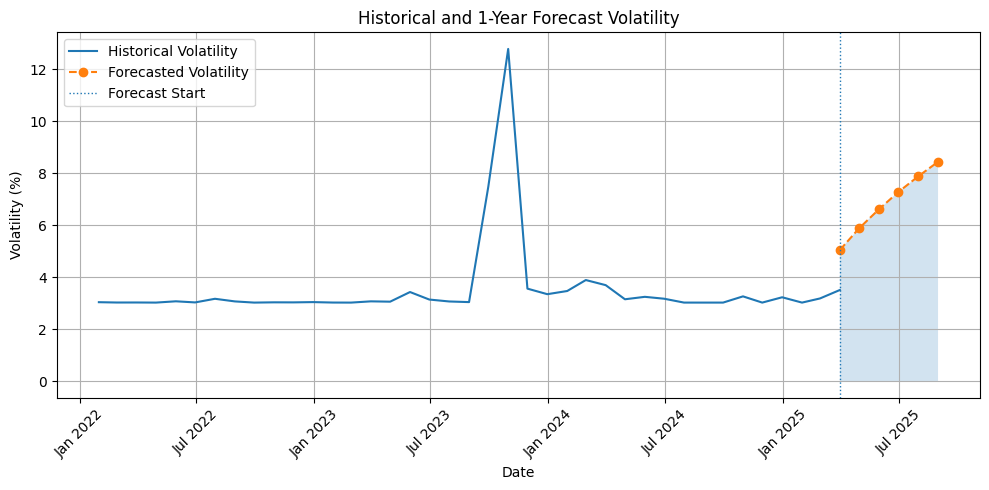

In [123]:
# Plot historical and forecasted volatility
# plt.figure()
# plt.plot(cond_vol.index, cond_vol, label='Historical Volatility')
# plt.plot(future_index, vol_forecast.values, label='Forecasted Volatility', linestyle='--')
# plt.xlabel('Date')
# plt.ylabel('Volatility (%)')
# plt.title('GARCH(1,1) Historical and 3-Month Ahead Forecasted Volatility')
# plt.legend()
# plt.tight_layout()
# plt.show()

cond_vol_2022 = cond_vol[cond_vol.index >= '2022-01-01']

plt.figure(figsize=(10, 5))
plt.plot(cond_vol_2022.index, cond_vol_2022, linestyle='-', label='Historical Volatility', linewidth=1.5)
plt.plot(future_index, vol_forecast.values, linestyle='--', label='Forecasted Volatility', linewidth=1.5, marker='o')
plt.axvline(last_date, linestyle=':', linewidth=1, label='Forecast Start')
plt.fill_between(future_index, vol_forecast.values, alpha=0.2)
plt.grid(True)
plt.gca().xaxis.set_major_formatter(plt.matplotlib.dates.DateFormatter('%b %Y'))
plt.xticks(rotation=45)
plt.xlabel('Date')
plt.ylabel('Volatility (%)')
plt.title('Historical and 1-Year Forecast Volatility')
plt.legend()
plt.tight_layout()
plt.show()

## I think we can scrap this regional thingies below

C:\Users\Lyrick\AppData\Local\Temp\ipykernel_4040\2870373152.py:9: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  .resample('M')
C:\Users\Lyrick\AppData\Local\Temp\ipykernel_4040\2870373152.py:40: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  future_index = pd.date_range(start=last_date + pd.offsets.MonthEnd(0),
C:\Users\Lyrick\AppData\Local\Temp\ipykernel_4040\2870373152.py:40: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  future_index = pd.date_range(start=last_date + pd.offsets.MonthEnd(0),
C:\Users\Lyrick\AppData\Local\Temp\ipykernel_4040\2870373152.py:40: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  future_index = pd.date_range(start=last_date + pd.offsets.MonthEnd(0),
C:\Users\Lyrick\AppData\Local\Temp\ipykernel_4040\2870373152.py:40: FutureWarning: 'M' is depreca

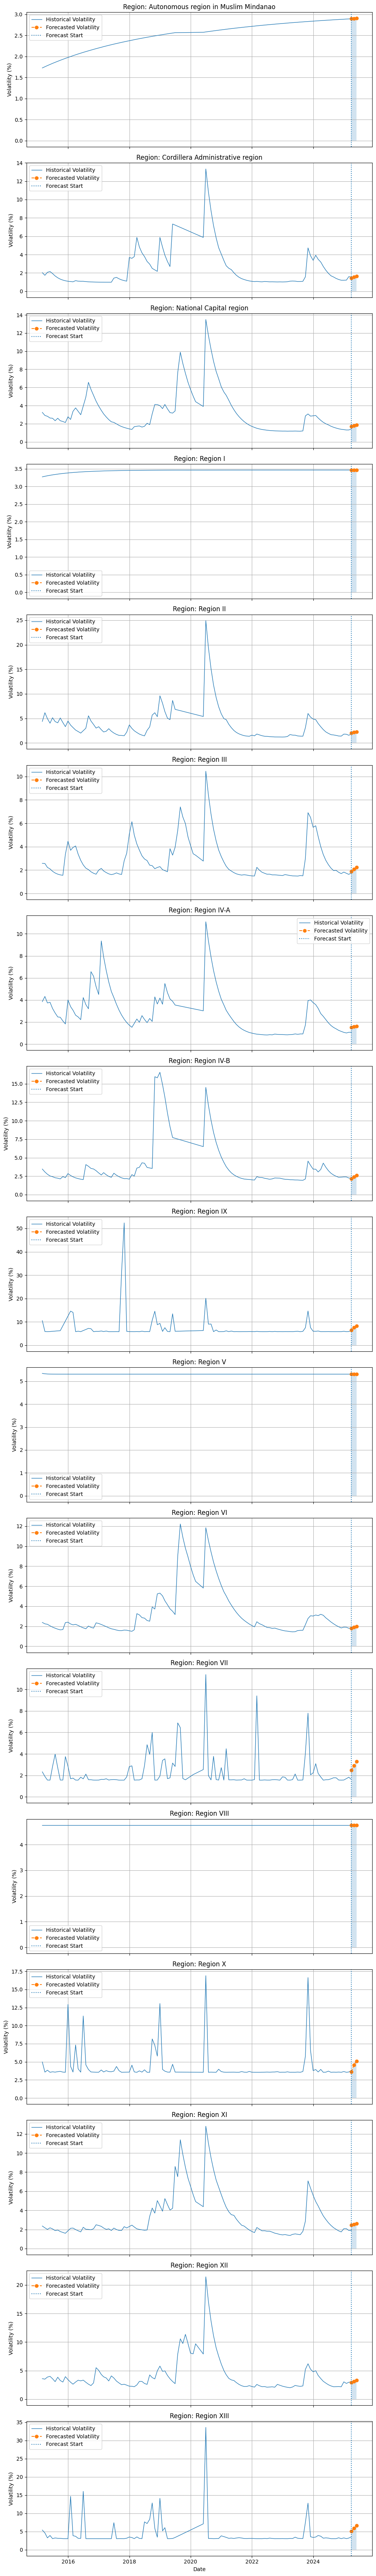

In [104]:
# 2. Choose region level (e.g., admin1)
region_col = 'admin1'

# 3. Resample monthly average price per region
monthly = (
    df_train
    .set_index('date')
    .groupby(region_col)['price']
    .resample('M')
    .mean()
    .dropna()
    .reset_index()
)

# 4. Pivot to a wide table for easier iteration
monthly_pivot = monthly.pivot(index='date', columns=region_col, values='price')

# 5. Prepare a figure with subplots (one per region)
n_regions = len(monthly_pivot.columns)
fig, axes = plt.subplots(n_regions, 1, figsize=(10, 4 * n_regions), sharex=True)

for ax, region in zip(axes, monthly_pivot.columns):
    # 6. Compute returns
    price_ts = monthly_pivot[region].dropna()
    returns = 100 * price_ts.pct_change().dropna()
    
    # 7. Fit GARCH(1,1)
    model = arch_model(returns, mean='Zero', vol='GARCH', p=1, q=1, dist='normal')
    res = model.fit(disp='off')
    
    # 8. Forecast next 3 months
    horizon = 3
    forecast = res.forecast(horizon=horizon)
    var_forecast = forecast.variance.iloc[-1]
    vol_forecast = var_forecast.pow(0.5)
    
    # 9. Gather historical and forecast
    cond_vol = res.conditional_volatility
    last_date = cond_vol.index[-1]
    future_index = pd.date_range(start=last_date + pd.offsets.MonthEnd(0),
                                 periods=horizon, freq='M')
    
    # 10. Plot
    ax.plot(cond_vol.index, cond_vol, label='Historical Volatility', linewidth=1)
    ax.plot(future_index, vol_forecast.values, '--o', label='Forecasted Volatility')
    ax.axvline(last_date, linestyle=':', label='Forecast Start')
    ax.fill_between(future_index, vol_forecast.values, alpha=0.2)
    ax.set_title(f'Region: {region}')
    ax.set_ylabel('Volatility (%)')
    ax.legend()
    ax.grid(True)

plt.xlabel('Date')
plt.tight_layout()
plt.show()